# XGBoost

- Dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [0]:
# EDA
import numpy as np
import pandas as pd
#import modin.pandas as pd
import missingno
import seaborn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime as dt
from pandas.plotting import scatter_matrix
from xgboost import plot_importance

# preprocessing
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

# tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# algos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [9]:
# load data
!wget https://raw.githubusercontent.com/erinkhoo/hard-skill-learning-list-2019/master/Machine_Learning_Problems/XGBoost/diabetes.csv

# dataframe
dataset = pd.read_csv('diabetes.csv')

--2020-05-14 20:50:35--  https://raw.githubusercontent.com/erinkhoo/hard-skill-learning-list-2019/master/Machine_Learning_Problems/XGBoost/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.004s  

2020-05-14 20:50:35 (6.15 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [13]:
#
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


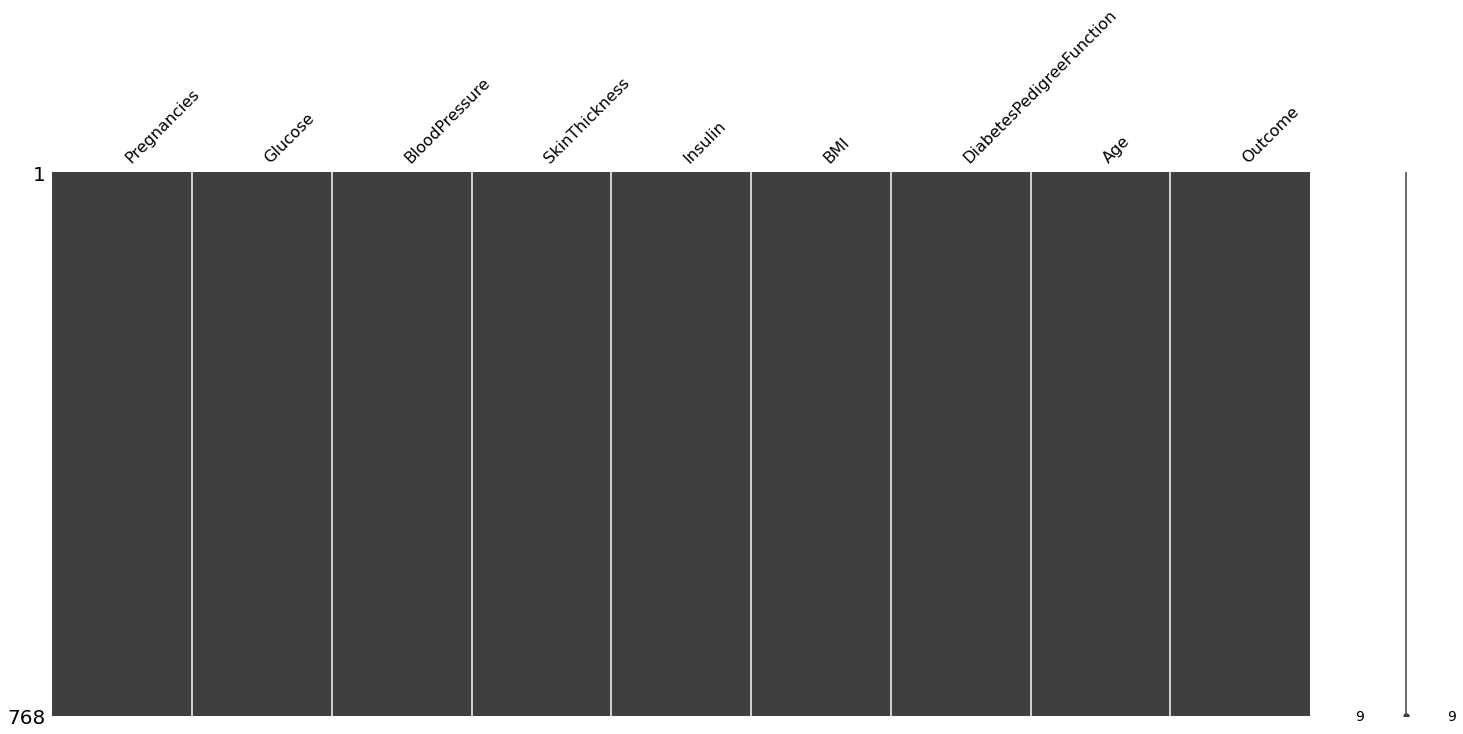

In [15]:
# missing values check
missingno.matrix(dataset)
plt.show()

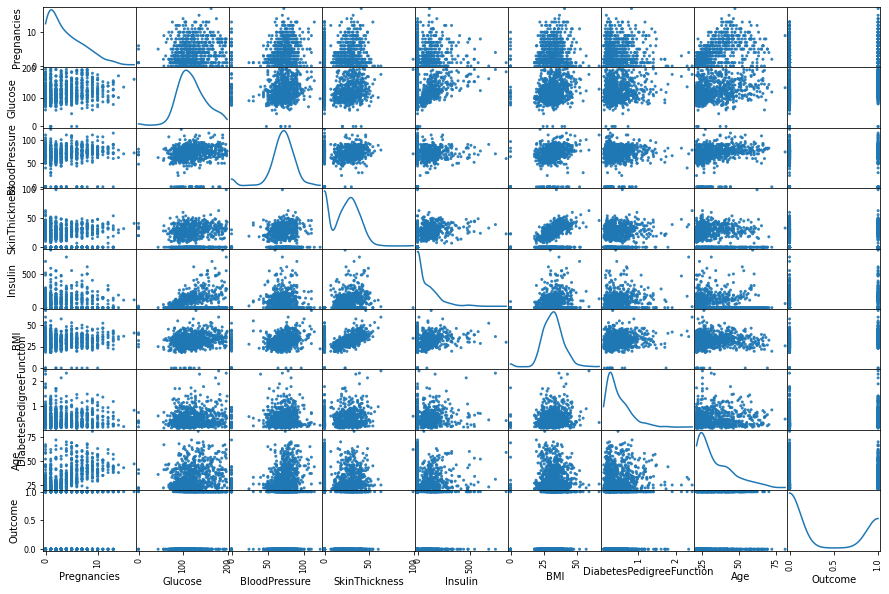

In [14]:
# scatterplot matrix on numerical features
scatter_matrix(dataset, figsize=(15,10), alpha=.9, diagonal='kde')
plt.show()

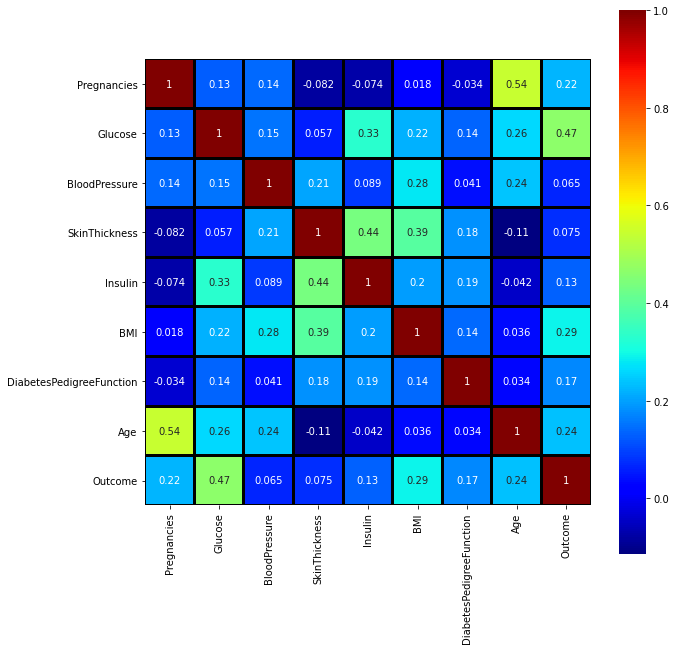

In [20]:
# correlation review
corr_matrix_dataset = dataset.corr()

f, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(corr_matrix_dataset, annot=True, square=True,
                cmap='jet', linewidths=2, linecolor='black')
plt.show()

In [22]:
# list of correlation 'strength'
corr_matrix_dataset['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [0]:
# select X; features and y; target
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

In [0]:
# split data into train and text sets

X_train, X_text, y_train, y_text = train_test_split(X, y,
                                                    test_size=.25,
                                                    random_state=42)

In [0]:
#
